# Part 0.1: Software Versions Used

In [1]:
import numpy as np; np.__version__

'1.9.3'

In [2]:
import scipy; print scipy.__version__

0.16.0


In [3]:
%matplotlib inline

In [4]:
import matplotlib; print matplotlib.__version__

1.4.3


In [5]:
import sklearn; print sklearn.__version__

0.16.1


In [6]:
import IPython; print IPython.__version__

4.0.0


In [7]:
import jupyter; print jupyter.__version__

1.0.0


## WND-CHARM version used

In [8]:
import wndcharm; print wndcharm.__version__

0.9.10


# Part 0.2: Current data

In [9]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier'

In [10]:
ls

CElegans_CuticleClassifier_Scanning_Window.ipynb  TrainAllTestSubsetN25.txt                         out.fit
CuticleTrainedClassifier.fit                      generate_sliding_window_features.py               trainingset1/
ParseHTML.pl*                                     old_analyses/                                     trainingset2/


In [11]:
cd trainingset2/

/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2


## Some of Eckley's cuticle crops aren't 20x20, filter out:

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [21]:
from os import walk
from os.path import sep
root, dirs, files = walk('.').next()
filter_out = []
for _dir in dirs:
    if _dir.startswith( '.'):
        continue
    sub_root, sub_dirs, sub_files = walk( _dir ).next()
    sub_files = [ _ for _ in sub_files if _.endswith( (".tif", ".tiff", ".TIF", ".TIFF" ) ) ]
    for tif in sub_files:
        img = plt.imread( sub_root + sep + tif )
        if img.shape != (20,20):
            path = './{}/{}'.format( sub_root, tif)
            print path, img.shape
            filter_out.append( path )
            

./moreBody/body3_01.tif (20, 19)
./moreBody/body3_02.tif (20, 19)
./moreBody/body3_03.tif (20, 19)
./moreBody/body3_04.tif (20, 19)
./moreBody/body3_05.tif (20, 19)
./moreBody/body3_06.tif (20, 19)
./moreBody/body3_07.tif (20, 19)
./moreBody/body3_08.tif (20, 19)
./moreBody/body3_09.tif (20, 19)
./moreBody/body3_10.tif (20, 19)
./moreBody/body3_11.tif (20, 19)
./moreBody/body3_12.tif (20, 19)
./moreBody/body3_13.tif (20, 19)
./moreBody/body3_14.tif (20, 19)
./moreBody/body3_15.tif (20, 19)
./moreBody/body3_16.tif (20, 19)
./moreBody/body3_17.tif (20, 19)
./moreCuticle/cuticle2_08.tif (20, 22)
./moreCuticle/cuticle2_09.tif (20, 22)
./moreCuticle/cuticle2_10.tif (20, 22)
./moreCuticle/cuticle2_11.tif (20, 22)
./moreCuticle/cuticle2_13.tif (20, 22)
./moreCuticle/cuticle2_14.tif (20, 22)
./moreCuticle/cuticle2_15.tif (20, 22)
./moreGray/gray3_39.tif (20, 19)
./moreGray/gray3_40.tif (20, 19)
./moreGray/gray3_41.tif (20, 19)
./moreGray/gray3_42.tif (20, 19)
./moreGray/gray3_43.tif (20, 19)
.

In [15]:
i = 0

moreGray/Day1_070000-1_003.tif


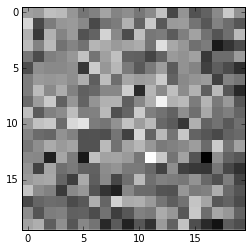

In [24]:
img_path = example_files[i]
print img_path
img = plt.imread( img_path )
plt.imshow( img, cmap=cm.Greys_r, interpolation='none')
i += 1

In [18]:
from wndcharm.FeatureSpace import FeatureSpace

In [19]:
#fs = FeatureSpace.NewFromDirectory( '.', long=True, quiet=True )
#fs = FeatureSpace.NewFromFileOfFiles( 'fof.tsv', long=True, quiet=True )
fs = FeatureSpace.NewFromFitFile( 'out.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE out.fit: <FeatureSpace "out.fit" n_features=2919 n_total_samples=1502 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 533, "moreCuticle": 580, "moreGray": 389)>


In [24]:
bad_sg_indices = [i for i in xrange(fs.num_samples) if fs._contiguous_sample_names[i] in filter_out ]

In [25]:
bad_sg_ids = [fs._contiguous_sample_group_ids[i] for i in xrange(fs.num_samples) if fs._contiguous_sample_names[i] in filter_out ]

In [26]:
bad_sg_ids == bad_sg_indices

True

In [28]:
fs.SampleReduce(None, bad_sg_ids, inplace=True)

SAMPLE REDUCED FEATURE SPACE:  <FeatureSpace "out.fit (subset) (sorted)" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 516, "moreCuticle": 573, "moreGray": 374)>


<FeatureSpace "out.fit (subset) (sorted)" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 516, "moreCuticle": 573, "moreGray": 374)>

In [29]:
fs.ToFitFile( 'CuticleClassifier_CleanedSamples.fit')

# Standard WND-CHARM analysis

## Section 1.1: Training accuracy ("fit-on-fit")

In [12]:
from wndcharm.FeatureSpace import FeatureSpace

In [13]:
fs = FeatureSpace.NewFromFitFile('CuticleClassifier_CleanedSamples.fit' )

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE CuticleClassifier_CleanedSamples.fit: <FeatureSpace "CuticleClassifier_CleanedSamples.fit" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 516, "moreCuticle": 573, "moreGray": 374)>


In [14]:
from wndcharm.FeatureWeights import FisherFeatureWeights

In [15]:
fs_norm = fs.Normalize( inplace=False )

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "CuticleClassifier_CleanedSamples.fit" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 516, "moreCuticle": 573, "moreGray": 374)>


In [16]:
fw = FisherFeatureWeights.NewFromFeatureSpace( fs_norm).Threshold( _all=True )

In [17]:
fw.Print(10)

FisherFeatureWeights (2919 features)
Rank	Value	Name
====	=====	====
1	49.585790	Haralick Textures (Chebyshev (Fourier ())) [10]
2	47.061154	Haralick Textures (Chebyshev (Fourier ())) [0]
3	38.495888	Zernike Coefficients (Fourier ()) [20]
4	31.967242	Haralick Textures (Fourier ()) [8]
5	30.418400	Zernike Coefficients (Fourier ()) [49]
6	30.075201	Haralick Textures (Fourier ()) [22]
7	28.930112	Zernike Coefficients (Fourier ()) [12]
8	27.691285	Haralick Textures (Fourier ()) [10]
9	24.844825	Zernike Coefficients (Fourier ()) [64]
10	24.072918	Haralick Textures (Chebyshev (Fourier ())) [22]
<output truncated by user via "display" arg, 2909 more feature weights>


In [18]:
fw.Print(50)

FisherFeatureWeights (2919 features)
Rank	Value	Name
====	=====	====
1	49.585790	Haralick Textures (Chebyshev (Fourier ())) [10]
2	47.061154	Haralick Textures (Chebyshev (Fourier ())) [0]
3	38.495888	Zernike Coefficients (Fourier ()) [20]
4	31.967242	Haralick Textures (Fourier ()) [8]
5	30.418400	Zernike Coefficients (Fourier ()) [49]
6	30.075201	Haralick Textures (Fourier ()) [22]
7	28.930112	Zernike Coefficients (Fourier ()) [12]
8	27.691285	Haralick Textures (Fourier ()) [10]
9	24.844825	Zernike Coefficients (Fourier ()) [64]
10	24.072918	Haralick Textures (Chebyshev (Fourier ())) [22]
11	22.932657	Haralick Textures (Chebyshev (Fourier ())) [18]
12	22.893440	Haralick Textures (Fourier ()) [18]
13	22.668082	Zernike Coefficients (Fourier ()) [30]
14	20.694201	Zernike Coefficients (Fourier ()) [26]
15	18.174957	Haralick Textures (Chebyshev (Fourier ())) [8]
16	18.137421	Zernike Coefficients (Fourier ()) [37]
17	17.294851	Zernike Coefficients (Fourier ()) [58]
18	16.763116	Haralick Text

In [35]:
reduced_fw = fw.Threshold()

In [36]:
reduced_fw

<FisherFeatureWeights n_features=437 feat0="Haralick Textures (Chebyshev (Fourier ())) [10]" val0=49.5857897413>

In [37]:
reduced_fs = fs_norm.FeatureReduce( reduced_fw, inplace=False )

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "out.fit (subset) (sorted) (feature reduced)" n_features=437 n_total_samples=1463 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 516, "moreCuticle": 573, "moreGray": 374)>:'


In [38]:
from wndcharm.FeatureSpacePrediction import FeatureSpaceClassification

In [39]:
table1_1 = FeatureSpaceClassification.NewWND5( reduced_fs, reduced_fs, reduced_fw, quiet=True, name="Table 1-1: Fit on Fit" )

In [40]:
table1_1.Print()

FeatureSpaceClassification "Table 1-1: Fit on Fit" (1463 classifications)
1441/1463 correct = 98.50%


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	498	17	1	|	516	96.51%
moreCuticle	4	569	0	|	573	99.30%
moreGray	0	0	374	|	374	100.00%

Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.11	0.00	
moreCuticle	0.04	1.00	0.00	
moreGray	0.00	0.00	1.00	

Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.8975	0.1005	0.0019	
moreCuticle	0.0405	0.9595	0.0000	
moreGray	0.0009	0.0000	0.9991	



## Section 1.2: Cross-validation WITHOUT LDA

In [42]:
from wndcharm.FeatureSpacePredictionExperiment import FeatureSpaceClassificationExperiment

In [43]:
exp = FeatureSpaceClassificationExperiment.NewShuffleSplit( fs, n_iter=100, random_state=42, quiet=True )

iter	split class acc.
0	0.992907801418
1	0.989361702128
2	0.996453900709
3	0.992907801418
4	0.989361702128
5	0.982269503546
6	0.989361702128
7	0.985815602837
8	0.989361702128
9	0.982269503546
10	0.975177304965
11	0.996453900709
12	0.985815602837
13	0.978723404255
14	0.989361702128
15	0.989361702128
16	0.989361702128
17	1.0
18	0.982269503546
19	0.985815602837
20	0.985815602837
21	0.982269503546
22	0.989361702128
23	0.996453900709
24	0.989361702128
25	0.989361702128
26	0.985815602837
27	1.0
28	0.992907801418
29	0.985815602837
30	0.989361702128
31	0.985815602837
32	0.996453900709
33	0.985815602837
34	0.985815602837
35	0.982269503546
36	0.989361702128
37	0.992907801418
38	0.996453900709
39	0.982269503546
40	0.985815602837
41	0.996453900709
42	1.0
43	0.992907801418
44	0.978723404255
45	0.992907801418
46	0.975177304965
47	0.992907801418
48	0.978723404255
49	0.982269503546
50	0.996453900709
51	0.989361702128
52	0.982269503546
53	0.996453900709
54	0.989361702128
55	0.992907801418
56	0.98581560

In [44]:
exp.Print()

FeatureSpaceClassificationExperiment "out.fit (subset) (sorted) (sorted)" (100 iterations)
27872/28200 correct = 98.84 +/- 0.13% w/ 95% conf. (normal approx. interval)


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	9103	273	24	|	9400	96.84%
moreCuticle	22	9378	0	|	9400	99.77%
moreGray	9	0	9391	|	9400	99.90%


Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.10	0.00	
moreCuticle	0.04	1.00	0.00	
moreGray	0.00	0.00	1.00	


Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.9047	0.0928	0.0026	
moreCuticle	0.0381	0.9619	0.0000	
moreGray	0.0019	0.0000	0.9981	


Feature Weight Analysis (top 20 features):
Rank	mean	count	StdDev	Min	Max	Name
----	----	-----	------	---	---	----
1	47.303	100	2.446	41.113	54.517	Haralick Textures (Chebyshev (Fourier ())) [10]
2	

In [45]:
exp.Print()

FeatureSpaceClassificationExperiment "out.fit (subset) (sorted) (sorted)" (100 iterations)
27872/28200 correct = 98.84 +/- 0.13% w/ 95% conf. (normal approx. interval)


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	9103	273	24	|	9400	96.84%
moreCuticle	22	9378	0	|	9400	99.77%
moreGray	9	0	9391	|	9400	99.90%


Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.10	0.00	
moreCuticle	0.04	1.00	0.00	
moreGray	0.00	0.00	1.00	


Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.9047	0.0928	0.0026	
moreCuticle	0.0381	0.9619	0.0000	
moreGray	0.0019	0.0000	0.9981	


Feature Weight Analysis (top 20 features):
Rank	mean	count	StdDev	Min	Max	Name
----	----	-----	------	---	---	----
1	47.303	100	2.446	41.113	54.517	Haralick Textures (Chebyshev (Fourier ())) [10]
2	

# Section 1.2: X-val WITH LDA

In [46]:
exp = FeatureSpaceClassificationExperiment.NewShuffleSplit( fs, n_iter=100, lda=True, random_state=42 )

iter	split class acc.
0	0.989361702128
1	0.996453900709
2	1.0
3	1.0
4	0.996453900709
5	0.992907801418
6	0.996453900709
7	0.982269503546
8	0.985815602837
9	0.992907801418
10	0.992907801418
11	0.996453900709
12	0.992907801418
13	0.996453900709
14	0.989361702128
15	0.992907801418
16	0.996453900709
17	1.0
18	0.989361702128
19	0.982269503546
20	0.992907801418
21	0.989361702128
22	0.989361702128
23	0.996453900709
24	1.0
25	0.996453900709
26	0.985815602837
27	0.996453900709
28	0.996453900709
29	0.996453900709
30	0.992907801418
31	1.0
32	1.0
33	0.996453900709
34	0.996453900709
35	0.985815602837
36	0.992907801418
37	0.996453900709
38	0.992907801418
39	0.982269503546
40	0.989361702128
41	0.992907801418
42	1.0
43	0.992907801418
44	0.989361702128
45	0.996453900709
46	0.992907801418
47	0.992907801418
48	0.992907801418
49	0.996453900709
50	0.992907801418
51	0.985815602837
52	0.989361702128
53	0.996453900709
54	0.996453900709
55	0.996453900709
56	0.996453900709
57	0.992907801418
58	0.992907801418
59	

/usr/local/lib/python2.7/site-packages/sklearn/lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [47]:
exp.Print()

Displaying feature weight statistics for all 2 features
FeatureSpaceClassificationExperiment "out.fit (subset) (sorted) (sorted)" (100 iterations)
28001/28200 correct = 99.29 +/- 0.10% w/ 95% conf. (normal approx. interval)


Confusion Matrix:
           	moreBody	moreCuticle	moreGray	|	total	acc.
           	--------	-----------	--------	|	-----	----
moreBody	9289	87	24	|	9400	98.82%
moreCuticle	40	9360	0	|	9400	99.57%
moreGray	48	0	9352	|	9400	99.49%


Similarity Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	1.00	0.01	0.00	
moreCuticle	0.00	1.00	0.00	
moreGray	0.00	0.00	1.00	


Average Class Probability Matrix:
           	moreBody	moreCuticle	moreGray
           	--------	-----------	--------
moreBody	0.9877	0.0097	0.0026	
moreCuticle	0.0042	0.9958	0.0000	
moreGray	0.0049	0.0001	0.9951	


Feature Weight Analysis (top 2 features):
Rank	mean	count	StdDev	Min	Max	Name
----	----	-----	------	---	---	----
1	1.000	100	0.000	1.000	1.00

## Section 1.3: Num samples classifier saturation grid search

Using top 15% of features by default

In [48]:
params = {}
params['feature_space'] = fs
params['quiet'] = False
params['n_iter'] = 100
params['param_space'] = 20
params['random_state'] = 42

In [49]:
exp = FeatureSpaceClassificationExperiment.NumSamplesGridSearch( **params )

Using num samples per class param space of : [3, 4, 6, 8, 11, 14, 19, 26, 35, 47, 63, 85, 114, 154, 207, 278, 373]
NUM TRAINING SET SAMPLES GRID SEARCH RESULTS:
n samples	 figure of merit
3	0.746666666667
4	0.873333333333
6	0.933333333333
8	0.94
11	0.943333333333
14	0.953333333333
19	0.976666666667
26	0.98
35	0.966666666667
47	0.956666666667
63	0.986666666667
85	0.993333333333
114	0.986666666667
154	0.98
207	0.993333333333
278	0.986666666667
373	0.993333333333


In [50]:
params['lda']=True
exp = FeatureSpaceClassificationExperiment.NumSamplesGridSearch( **params )

Using num samples per class param space of : [3, 4, 6, 8, 11, 14, 19, 26, 35, 47, 63, 85, 114, 154, 207, 278, 373]
NUM TRAINING SET SAMPLES GRID SEARCH RESULTS:
n samples	 figure of merit
3	0.166666666667
4	0.85
6	0.853333333333
8	0.453333333333
11	0.61
14	0.743333333333
19	0.883333333333
26	0.94
35	0.976666666667
47	0.993333333333
63	0.98
85	0.996666666667
114	0.98
154	0.94
207	0.993333333333
278	0.99
373	0.99


/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


## Section 1.4: Num features classifier saturation grid search w/ optimized # samples

85 samples/class gets you to 99% classification accuracy

In [51]:
train_set = fs.Split(train_size=85, test_size=0, random_state=42)

SPLIT FEATURE SPACE INTO TRAINING SET:  <FeatureSpace "out.fit (subset) (sorted) (subset) (sorted)" n_features=2919 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>


In [52]:
params = {}
params['feature_space'] = train_set
params['quiet'] = False
params['n_iter'] = 100
params['param_space'] = 20
params['random_state'] = 42

In [53]:
FeatureSpaceClassificationExperiment.NumFeaturesGridSearch( **params )

Using num features param space of : [1, 2, 3, 5, 7, 11, 16, 24, 36, 54, 81, 120, 179, 266, 397, 592, 882, 1314, 1959, 2919]
FEATURE WEIGHT GRID SEARCH RESULTS:
n features	 figure of merit
1	0.809848484848
2	0.790151515152
3	0.790606060606
5	0.814393939394
7	0.843333333333
11	0.867878787879
16	0.898939393939
24	0.95196969697
36	0.982272727273
54	0.974393939394
81	0.976060606061
120	0.983484848485
179	0.981515151515
266	0.981515151515
397	0.981212121212
592	0.980757575758
882	0.980303030303
1314	0.980454545455
1959	0.980303030303
Skipping n_features=2919 and above due to feature reduction error


[(1, 0.8098484848484848),
 (2, 0.7901515151515152),
 (3, 0.7906060606060606),
 (5, 0.8143939393939394),
 (7, 0.8433333333333334),
 (11, 0.8678787878787879),
 (16, 0.8989393939393939),
 (24, 0.951969696969697),
 (36, 0.9822727272727273),
 (54, 0.9743939393939394),
 (81, 0.9760606060606061),
 (120, 0.9834848484848485),
 (179, 0.9815151515151516),
 (266, 0.9815151515151516),
 (397, 0.9812121212121212),
 (592, 0.9807575757575757),
 (882, 0.9803030303030303),
 (1314, 0.9804545454545455),
 (1959, 0.9803030303030303)]

## Section 1.5: Num samples classifier saturation grid search w/ optimized # features

100 features gets you to 98% classification accuracy

In [54]:
params = {}
params['feature_space'] = fs
params['quiet'] = False
params['n_iter'] = 100
params['param_space'] = 20
params['random_state'] = 42
params['features_size'] = 100

In [55]:
exp = FeatureSpaceClassificationExperiment.NumSamplesGridSearch( **params )

Using num samples per class param space of : [3, 4, 6, 8, 11, 14, 19, 26, 35, 47, 63, 85, 114, 154, 207, 278, 373]
NUM TRAINING SET SAMPLES GRID SEARCH RESULTS:
n samples	 figure of merit
3	0.74
4	0.863333333333
6	0.92
8	0.926666666667
11	0.93
14	0.95
19	0.966666666667
26	0.976666666667
35	0.946666666667
47	0.963333333333
63	0.976666666667
85	0.99
114	0.98
154	0.976666666667
207	0.99
278	0.99
373	0.993333333333


Conclusion: 85 samples/class result is stable when reducing num_features to 100 from default 438. Save (unnormalized) training set to file

In [19]:
train_set = fs.Split(train_size=85, test_size=0, random_state=42)

SPLIT FEATURE SPACE INTO TRAINING SET:  <FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted)" n_features=2919 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>


In [58]:
ts_norm = train_set.Normalize( inplace=False)

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "out.fit (subset) (sorted) (subset) (sorted)" n_features=2919 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>


In [57]:
from wndcharm.FeatureWeights import FisherFeatureWeights

In [60]:
fw = FisherFeatureWeights.NewFromFeatureSpace( ts_norm )

In [20]:
train_set.FeatureReduce( fw[:100], inplace=True)

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted) (feature reduced)" n_features=100 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>:'


<FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted) (feature reduced)" n_features=100 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>

In [21]:
train_set.ToFitFile( './CuticleTrainedClassifier_s85_f100.fit')

In [22]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2'

In [23]:
!ls -lh CuticleTrainedClassifier_s85_f100.fit

-rw-r--r--  1 colettace  staff   262K Sep 28 17:26 CuticleTrainedClassifier_s85_f100.fit


# Collage of training set

In [67]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2/

/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2


In [107]:
w = 20
h = 20
num_across = 10
num_down = train_set.num_samples / num_across

In [108]:
num_down

25

In [109]:
collage = np.empty( (h * (num_down+1), w * num_across) )

In [110]:
collage.shape

(520, 200)

In [111]:
row = 0
col = 0
for path in train_set._contiguous_sample_names:
    roi = plt.imread(path)
    #print roi.shape
    y0 = row*h
    y1 = (row+1)*h
    x0 = col*w
    x1 = (col+1)*w
    #print 'row', str( row), 'col', str(col), x0, y0, x1, y1 , 'shape', str(roi.shape)
    collage[ y0:y1, x0:x1 ] = roi
    col+= 1
    if col == num_across:
        col = 0
        row += 1

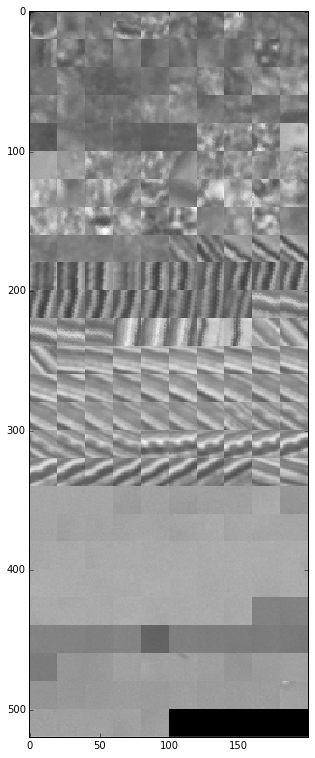

In [112]:
plt.figure(figsize = (5,13))
plt.imshow( collage, cmap=cm.Greys_r, interpolation='none')

# Generate features

In [1]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier'

In [2]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis


In [3]:
from os import walk

In [11]:
from os.path import sep

In [5]:
root, dirs, files = next(walk('.'))

In [6]:
dirs

['E16fld53', 'G9fld09', 'G9fld37', 'G9fld44', 'G9fld51']

In [7]:
from wndcharm.FeatureVector import SlidingWindow

In [8]:
import time

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [10]:
%matplotlib inline

In [14]:
from wndcharm.FeatureSpace import FeatureSpace

In [ ]:
t1 = time.time()
for the_dir in dirs:
    tif_path = './{0}/{1}/{1}.tif'.format( root, the_dir )
    window = SlidingWindow( source_filepath=tif_path, w=20, h=20, deltax=10, deltay=10, long=True)
    test_img = FeatureSpace.NewFromSlidingWindow( window, n_jobs=True, quiet=True)
    fit_path = './{0}/{1}/{1}_ScanningWindow_20x20_dx10_dy10_long.fit'.format( root, the_dir )
    test_img.ToFitFile( fit_path )
t2 = time.time()
print "completed in {} hours.".format( (t2-t1)/3600 )

In [15]:
t1 = time.time()
test_img = FeatureSpace.NewFromSlidingWindow( window, n_jobs=True, quiet=True)
t2 = time.time()
print "Feature calculation for {} features in {} positions took {} minutes.".format( fs.num_features, window.num_positions, (t2-t1)/60 )

Feature calculation for 100 features in 13974 positions took 29.5308892687 minutes.


In [16]:
test_img

<FeatureSpace n_features=100 n_total_samples=13974 n_samples_per_group=1 n_classes=1 samples_per_class=("UNKNOWN": 13974)>

# Comparing small "optimized" classifier to larger classifier (more samps, feats)

In [52]:
pwd

u'/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld44'

In [53]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2/

/Users/colettace/projects/new_worm_bodypart_heatmap/cuticle_classifier/trainingset2


In [54]:
ls *.fit

CuticleClassifier_CleanedSamples.fit   CuticleTrainedClassifier_s85_f100.fit  out.fit


In [4]:
from wndcharm.FeatureSpace import FeatureSpace

In [5]:
classifier = FeatureSpace.NewFromFitFile( 'CuticleClassifier_CleanedSamples.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE CuticleClassifier_CleanedSamples.fit: <FeatureSpace "CuticleClassifier_CleanedSamples.fit" n_features=2919 n_total_samples=1463 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 516, "moreCuticle": 573, "moreGray": 374)>


In [6]:
classifier = classifier.Split( test_size=0, balanced_classes=True, random_state=42 )

SPLIT FEATURE SPACE INTO TRAINING SET:  <FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted)" n_features=2919 n_total_samples=1122 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 374, "moreCuticle": 374, "moreGray": 374)>


In [7]:
classifier.Normalize(inplace=True)

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted)" n_features=2919 n_total_samples=1122 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 374, "moreCuticle": 374, "moreGray": 374)>


<FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted)" n_features=2919 n_total_samples=1122 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 374, "moreCuticle": 374, "moreGray": 374)>

In [8]:
from wndcharm.FeatureWeights import FisherFeatureWeights

In [9]:
fw = FisherFeatureWeights.NewFromFeatureSpace(classifier).Threshold()

In [10]:
classifier.FeatureReduce( fw, inplace=True)

FEATURE-REDUCED FEATURE SPACE (orig len 2919) <FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted) (feature reduced)" n_features=437 n_total_samples=1122 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 374, "moreCuticle": 374, "moreGray": 374)>:'


<FeatureSpace "CuticleClassifier_CleanedSamples.fit (subset) (sorted) (feature reduced)" n_features=437 n_total_samples=1122 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 374, "moreCuticle": 374, "moreGray": 374)>

In [56]:
small_classifier = FeatureSpace.NewFromFitFile( 'CuticleTrainedClassifier_s85_f100.fit')

LOADED FEATURE SPACE FROM WND-CHARM .fit FILE CuticleTrainedClassifier_s85_f100.fit: <FeatureSpace "CuticleTrainedClassifier_s85_f100.fit" n_features=100 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>


In [57]:
small_classifier.Normalize(inplace=True)

NORMALIZED FEATURES AGAINST SELF FOR FEATURE SPACE: <FeatureSpace "CuticleTrainedClassifier_s85_f100.fit" n_features=100 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>


<FeatureSpace "CuticleTrainedClassifier_s85_f100.fit" n_features=100 n_total_samples=255 n_samples_per_group=1 n_classes=3 samples_per_class=("moreBody": 85, "moreCuticle": 85, "moreGray": 85)>

In [58]:
small_fw = FisherFeatureWeights.NewFromFeatureSpace( small_classifier)

In [19]:
from wndcharm.FeatureSpacePrediction import FeatureSpaceClassification

In [20]:
import time

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [24]:
from wndcharm.FeatureVector import SlidingWindow

In [28]:
def sort_key(x):
    num_cols = 137
    num_rows = 102
    base, Binfo, rest = x.source_filepath.split('-')
    #RemoveB
    Binfo = Binfo[1:]
    x, y, w, h = Binfo.split('_')
    x = int(x)
    y = int(y)
    deltax = 10
    deltay = 10
    col = x / deltax
    row = y / deltay
    # classifications are column major
    return row + (col * num_rows)

In [64]:
def show_result( tif_path, split ):
    #str_tok = 'E16fld53'
    #tif_path = str_tok + '.tif'
    split.individual_results.sort( key=sort_key )
    body, cuticle, gray = zip(* [ _.marginal_probabilities for _ in split.individual_results])
    window = SlidingWindow( source_filepath=tif_path, w=20, h=20, deltax=10, deltay=10, long=True)
    body = np.array( body)
    body = body.reshape( ( window.sliding_window_num_cols, window.sliding_window_num_rows) )
    body = body.T
    cuticle = np.array( cuticle)
    cuticle = cuticle.reshape( ( window.sliding_window_num_cols, window.sliding_window_num_rows) )
    cuticle = cuticle.T
    gray = np.array( gray)
    gray = gray.reshape( ( window.sliding_window_num_cols, window.sliding_window_num_rows) )
    gray = gray.T
    fig, ( (ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, squeeze=True, figsize=(15,12))
    fig.suptitle( tif_path + " n_samples/class=")
    im = plt.imread( tif_path )
    ax1.set_title( tif_path )
    ax1.imshow( im, cmap=cm.Greys_r, interpolation='none')
    ax2.set_title( 'BODY marginal probability')
    ax2.imshow( body, cmap=plt.cm.Blues, interpolation='none')
    ax3.set_title( 'CUTICLE marginal probability')
    ax3.imshow( cuticle , cmap=plt.cm.Blues, interpolation='none')
    ax4.set_title( 'GRAY marginal probability')
    ax4.imshow( gray, cmap=plt.cm.Blues, interpolation='none')

In [66]:
set((1,2,3)).pop()

1

In [70]:
def create_graphs( classifier, tif_path, test_fs_path, feature_weights ):
    t1 = time.time()
    test_img = FeatureSpace.NewFromFitFile( test_fs_path, num_samples_per_group=13974, quiet=True )
    test_img.FeatureReduce( feature_weights, inplace=True, quiet=True )
    test_img.Normalize( classifier, inplace=True, quiet=True )
    output_file = test_fs_path + '_RESULTS.tsv'
    split = FeatureSpaceClassification.NewWND5( classifier, test_img, feature_weights, output_filepath=output_file)
    split.individual_results.sort( key=sort_key )
    body, cuticle, gray = zip(* [ _.marginal_probabilities for _ in split.individual_results])
    window = SlidingWindow( source_filepath=tif_path, w=20, h=20, deltax=10, deltay=10, long=True)
    body = np.array( body)
    body = body.reshape( ( window.sliding_window_num_cols, window.sliding_window_num_rows) )
    body = body.T
    cuticle = np.array( cuticle)
    cuticle = cuticle.reshape( ( window.sliding_window_num_cols, window.sliding_window_num_rows) )
    cuticle = cuticle.T
    gray = np.array( gray)
    gray = gray.reshape( ( window.sliding_window_num_cols, window.sliding_window_num_rows) )
    gray = gray.T
    fig, ( (ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, squeeze=True, figsize=(15,12))
    samp_class = set(classifier.class_sizes).pop()
    fig.suptitle( tif_path + " n_samples/class={} n_features={}".format( samp_class, classifier.num_features),fontsize=20)
    im = plt.imread( tif_path )
    ax1.set_title( tif_path )
    ax1.imshow( im, cmap=cm.Greys_r, interpolation='none')
    ax2.set_title( 'BODY marginal probability')
    ax2.imshow( body, cmap=plt.cm.Blues, interpolation='none')
    ax3.set_title( 'CUTICLE marginal probability')
    ax3.imshow( cuticle , cmap=plt.cm.Blues, interpolation='none')
    ax4.set_title( 'GRAY marginal probability')
    ax4.imshow( gray, cmap=plt.cm.Blues, interpolation='none')
    t2 = time.time()
    print "operation took seconds", t2-t1

In [68]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/E16fld53/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/E16fld53


Saving output of function "NewWND5()" to file "E16fld53_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 22.4468488693


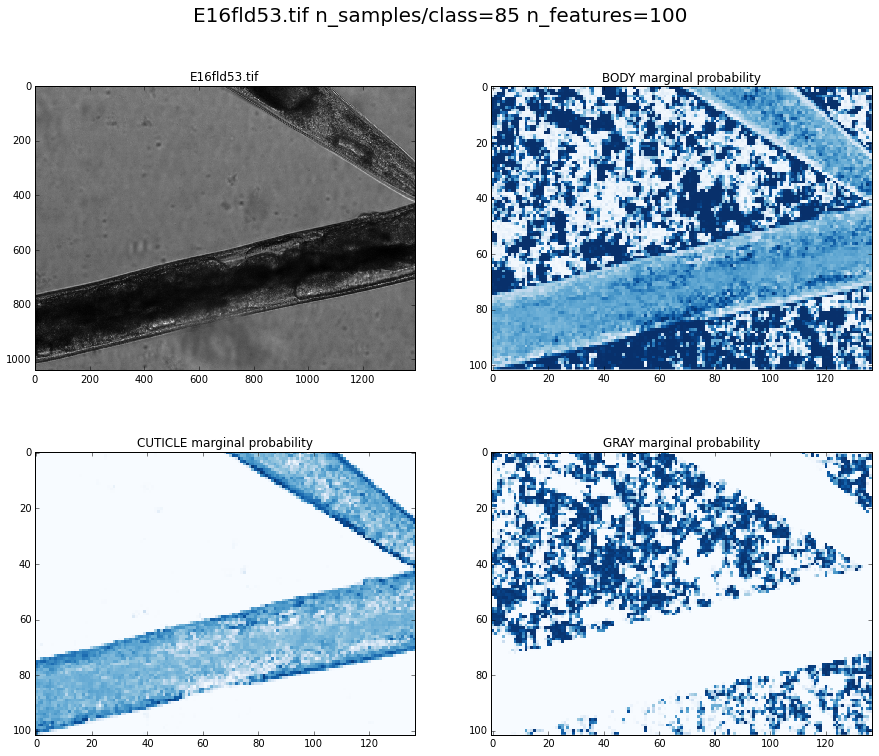

In [71]:
create_graphs( small_classifier, 'E16fld53.tif', 'E16fld53_ScanningWindow_20x20_dx10_dy10_long.fit', small_fw)

Saving output of function "NewWND5()" to file "E16fld53_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 33.3928918839


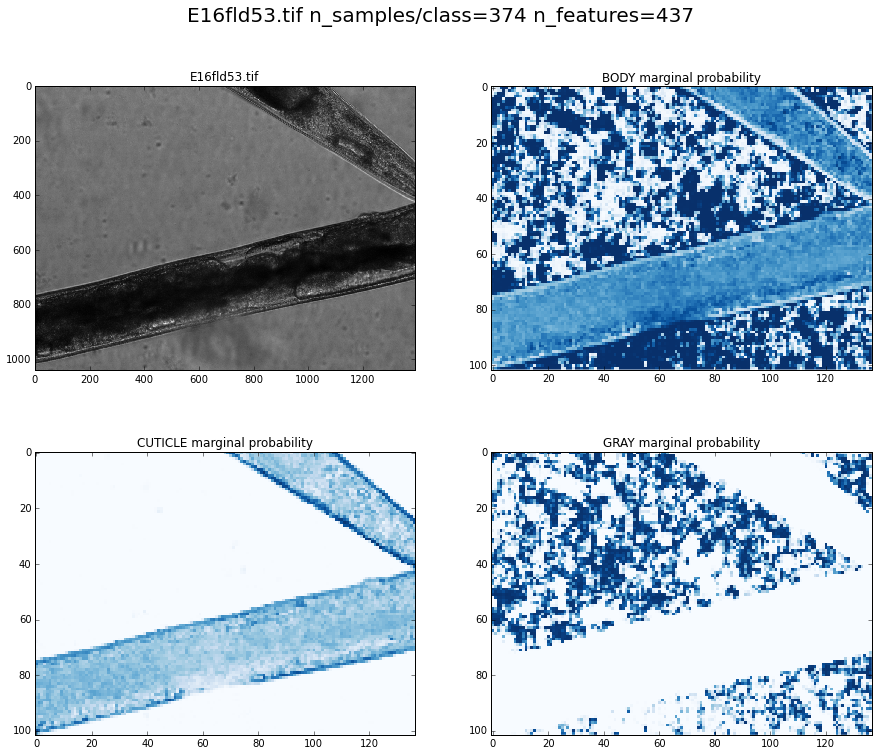

In [72]:
create_graphs( classifier, 'E16fld53.tif', 'E16fld53_ScanningWindow_20x20_dx10_dy10_long.fit', fw)

In [73]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld09/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld09


In [74]:
ls *.fit

G9fld09_ScanningWindow_20x20_dx10_dy10_long.fit


Saving output of function "NewWND5()" to file "G9fld09_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 23.0538730621


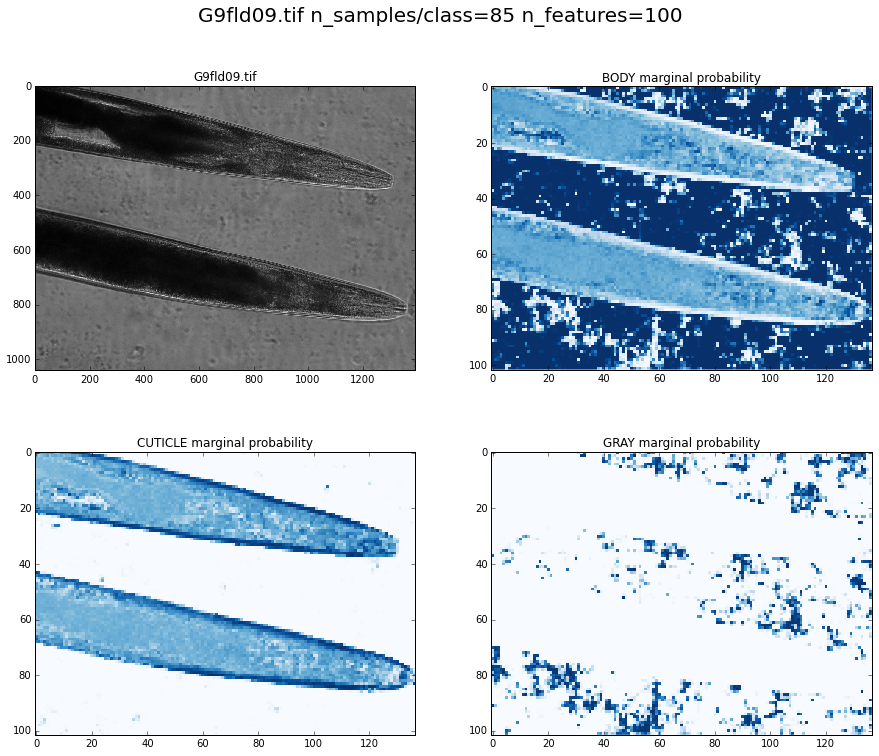

In [75]:
create_graphs( small_classifier, 'G9fld09.tif', 'G9fld09_ScanningWindow_20x20_dx10_dy10_long.fit', small_fw)

Saving output of function "NewWND5()" to file "G9fld09_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 33.2282431126


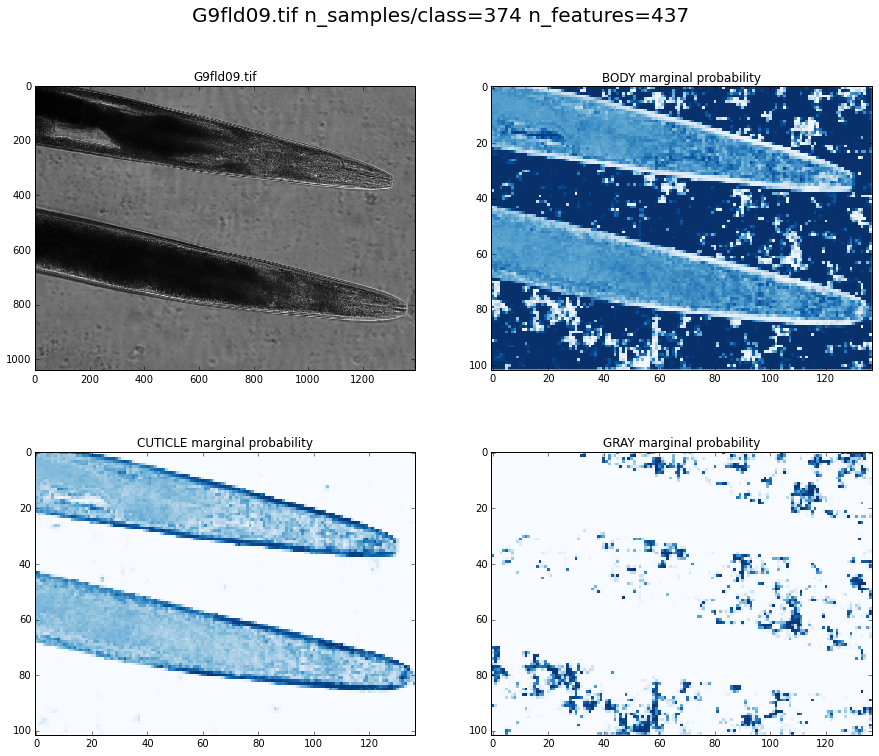

In [76]:
create_graphs( classifier, 'G9fld09.tif', 'G9fld09_ScanningWindow_20x20_dx10_dy10_long.fit', fw)

In [77]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld51/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld51


Saving output of function "NewWND5()" to file "G9fld51_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 24.0019919872


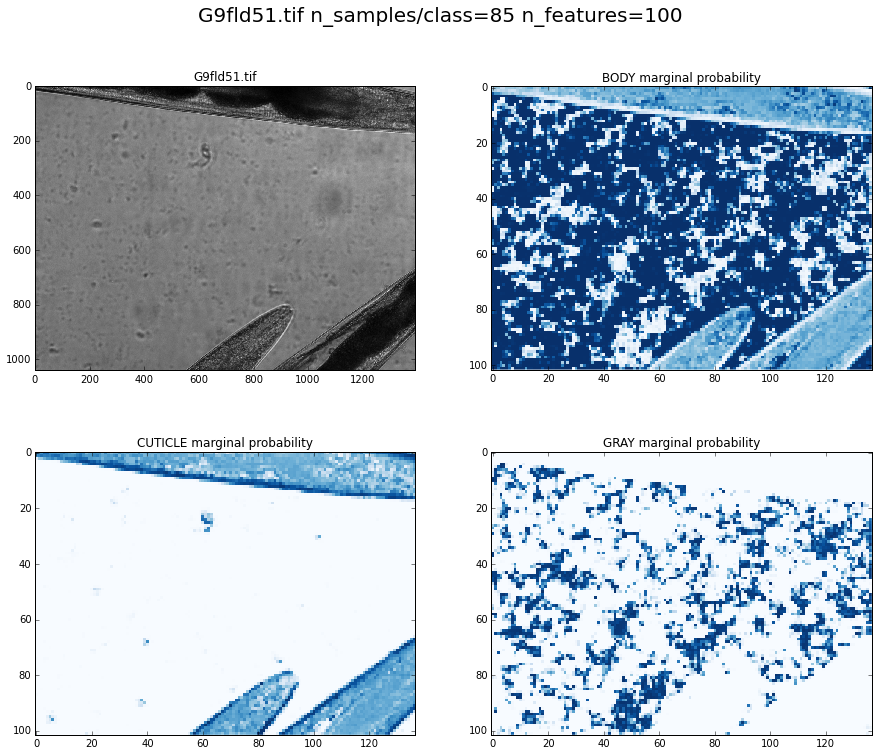

In [78]:
create_graphs( small_classifier, 'G9fld51.tif', 'G9fld51_ScanningWindow_20x20_dx10_dy10_long.fit', small_fw)

Saving output of function "NewWND5()" to file "G9fld51_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 31.8194410801


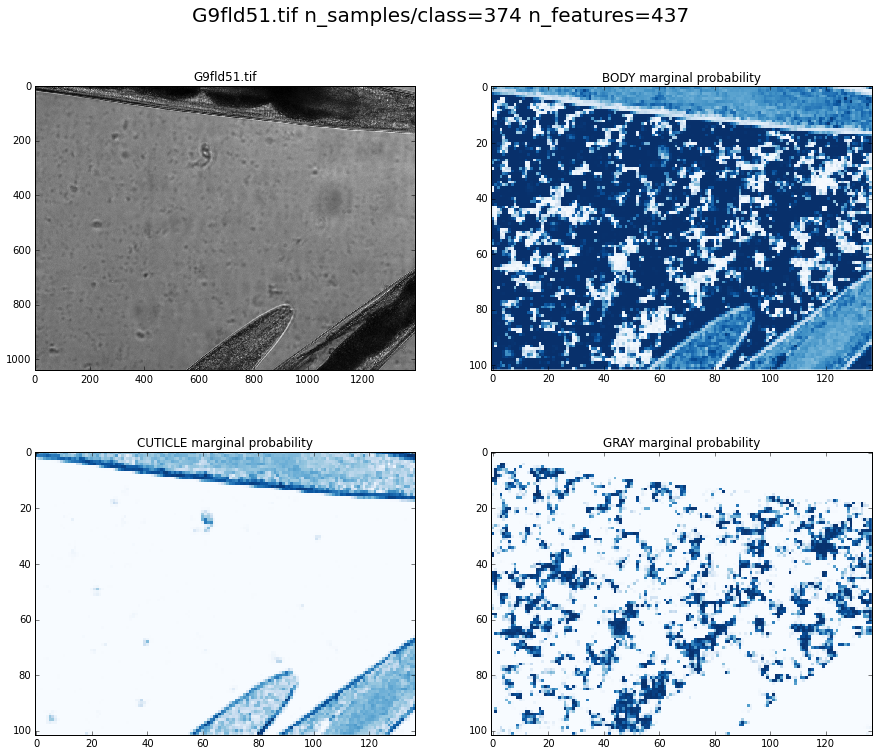

In [79]:
create_graphs( classifier, 'G9fld51.tif', 'G9fld51_ScanningWindow_20x20_dx10_dy10_long.fit', fw)

In [80]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld37/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld37


Saving output of function "NewWND5()" to file "G9fld37_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 22.3623611927


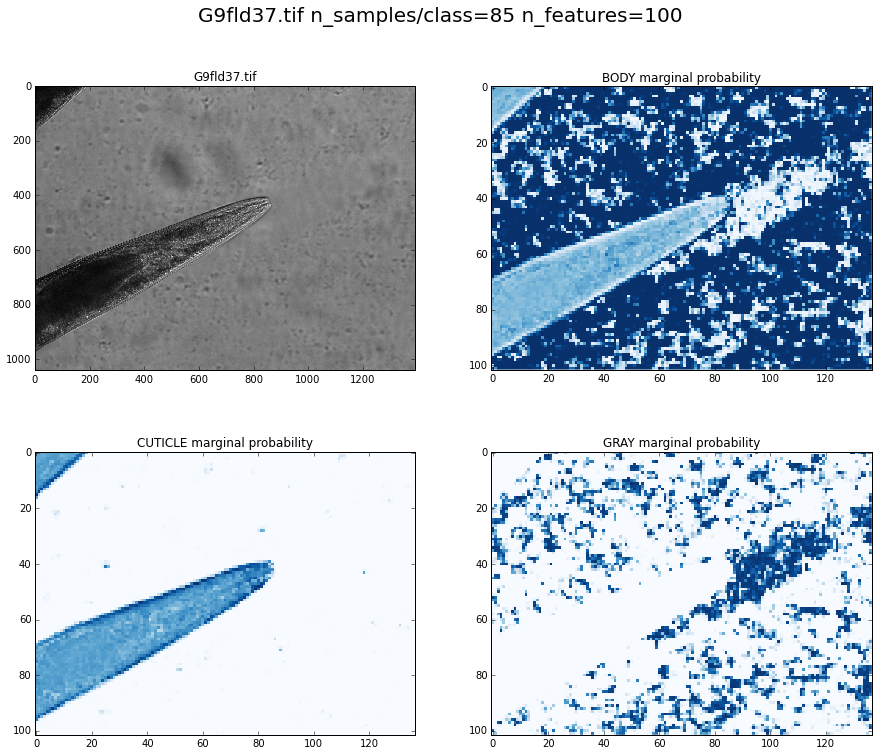

In [81]:
create_graphs( small_classifier, 'G9fld37.tif', 'G9fld37_ScanningWindow_20x20_dx10_dy10_long.fit', small_fw)

Saving output of function "NewWND5()" to file "G9fld37_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 33.75147295


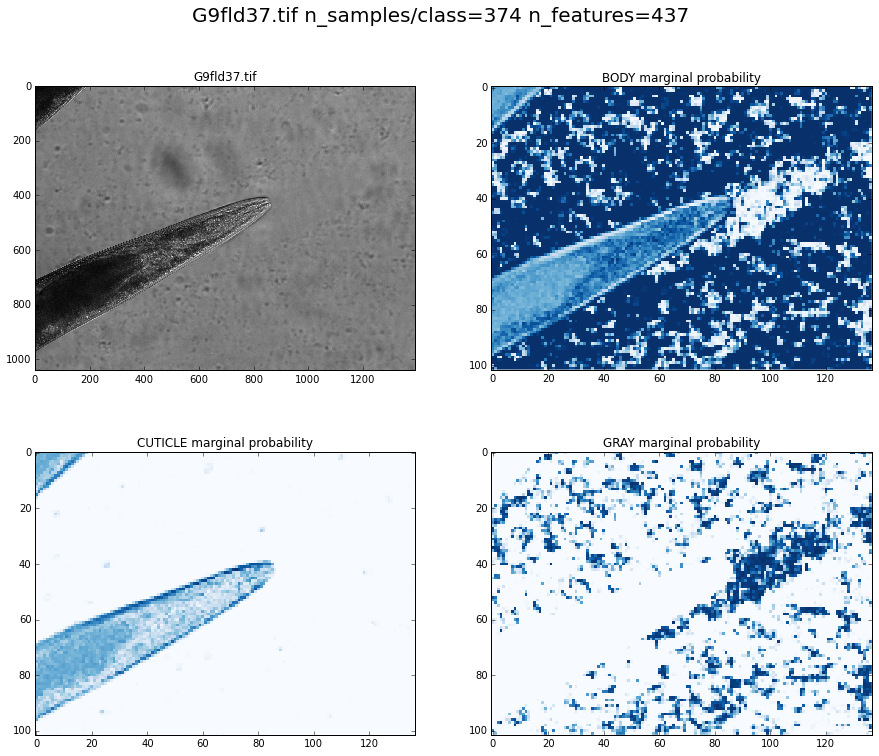

In [82]:
create_graphs( classifier, 'G9fld37.tif', 'G9fld37_ScanningWindow_20x20_dx10_dy10_long.fit', fw)

In [83]:
cd /Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld44/

/Users/colettace/projects/new_worm_bodypart_heatmap/2015_analysis/G9fld44


Saving output of function "NewWND5()" to file "G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 22.8267071247


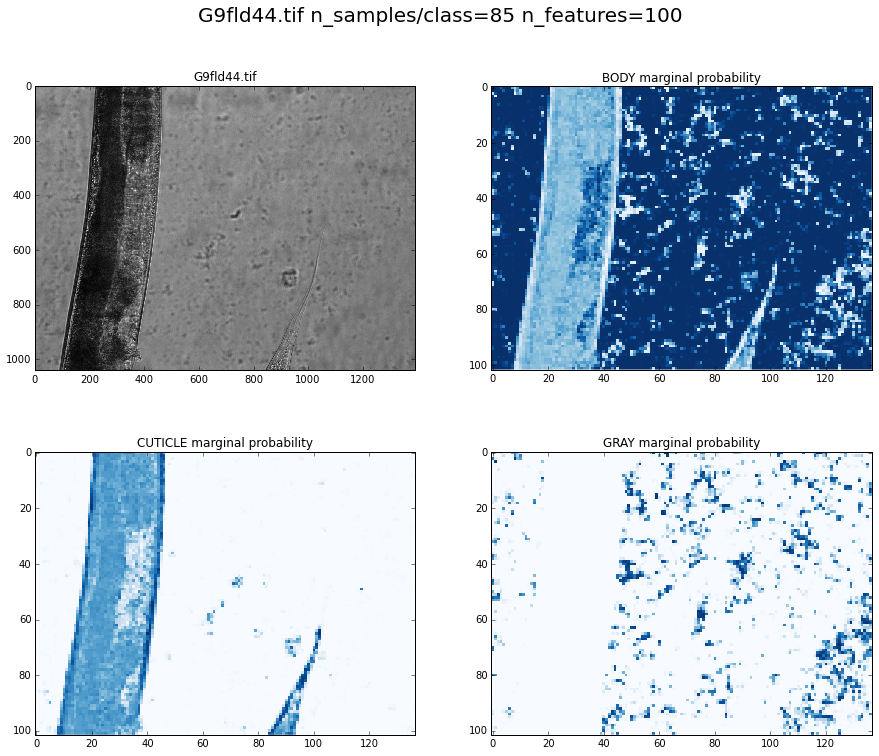

In [84]:
create_graphs( small_classifier, 'G9fld44.tif', 'G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit', small_fw)

Saving output of function "NewWND5()" to file "G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit_RESULTS.tsv", mode "w"
operation took seconds 33.8144187927


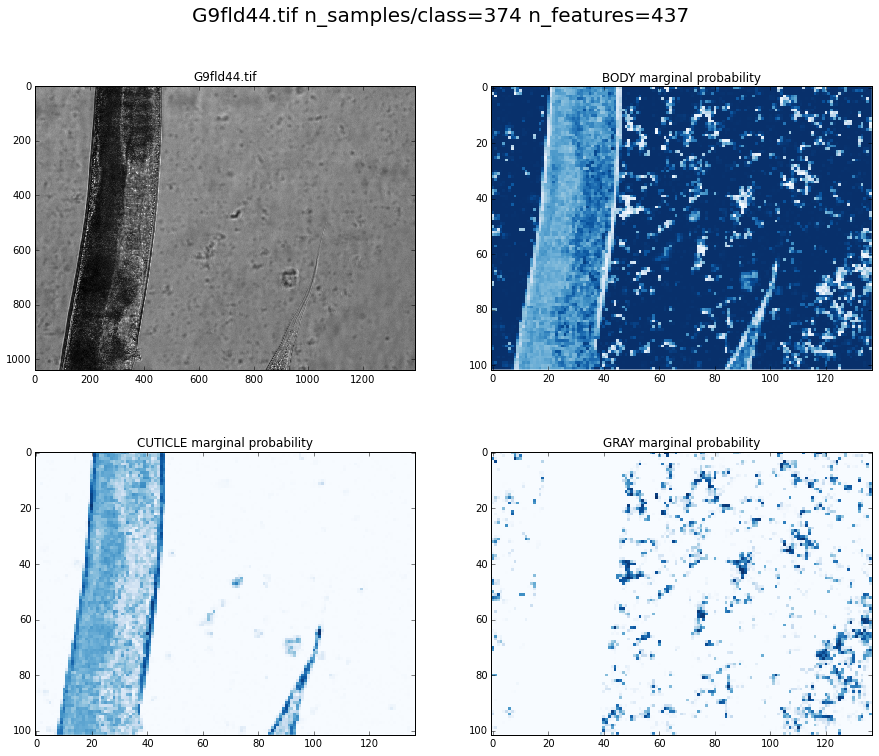

In [85]:
create_graphs( classifier, 'G9fld44.tif', 'G9fld44_ScanningWindow_20x20_dx10_dy10_long.fit', fw)